<a href="https://colab.research.google.com/github/roger21gm/neural-network-impl/blob/master/NeuralNetworkImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

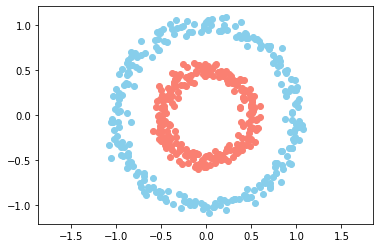

In [89]:
# Dataset creation

n = 500 #number of samples
p = 2 #number of features

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:,0] == 0,0], X[Y[:,0] == 0,1], c="skyblue")
plt.scatter(X[Y[:,0] == 1,0], X[Y[:,0] == 1,1], c="salmon")
plt.axis("equal")
plt.show()

In [0]:
# Calss to represent a Neural Network layer.
class neural_layer():

    def __init__(self, n_conn, n_neur, activation_function):
        
        self.activation_function = activation_function

        self.b = np.random.rand(1, n_neur) * 2  - 1 #bias random between [-1,1]
        self.W = np.random.rand(n_conn, n_neur) * 2  - 1  #Weigt random between [-1,1]

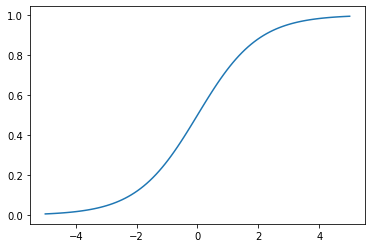

In [34]:
# Activation function definition 

# SIGMOID
sigm = (lambda x: 1 / (1 + np.e ** (-x)), #sigmoid function
        lambda x: x * (1-x)) # sigmoid function derivate
        
_x = np.linspace(-5,5, 100)
plt.plot(_x, sigm[0](_x))

# ReLU
relu = lambda x: np.maximum(0,x)


In [41]:
# Creation of neural network structure.

def create_nn(topology, activation_function):
    nn = []
    for l, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l], topology[l+1], activation_function))
    return nn

In [101]:
topology = [p, 4, 8, 1]
neural_network = create_nn(topology, sigm)

l2_cost = (lambda Ypredict, Yreal: np.mean((Ypredict- Yreal)) ** 2, # Cost function
           lambda Ypredict, Yreal: (Ypredict- Yreal)) # Cost function derivate

def train(neural_network, X, Y, l2_cost, learning_rate=0.5, train=True):
    
    out = [(None, X)] # [(weighted_sum_l0, activation_function_val_l0), ...]

    # Forward pass
    for l, layer in enumerate(neural_network):
        z = out[-1][1] @ neural_network[l].W + neural_network[l].b # weighted sum
        a = neural_network[l].activation_function[0](z) # Apply activation function
        out.append((z,a))
    
    if train:
        deltas = []

        for l in reversed(range(0, len(neural_network))):
            
            # Backward pass
            z = out[l+1][0]
            a = out[l+1][1]

            if l == len(neural_network) - 1:
                # Calc delta last layer
                deltas.insert(0, l2_cost[1](a, Y) * neural_network[l].activation_function[1](a))
            else:
                # Calc delta according to previous layer
                deltas.insert(0, deltas[0] @ _W.T * neural_network[l].activation_function[1](a))

            _W = neural_network[l].W
            

            # Gradient descent
            neural_network[l].b = neural_network[l].b - np.mean(deltas[0], axis=0, keepdims=True) * learning_rate
            neural_network[l].W = neural_network[l].W - out[l][1].T @ deltas[0] * learning_rate
        
    return out[-1][1]

train(neural_network, X, Y, l2_cost, 0.5)
print()

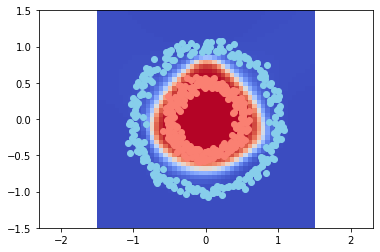

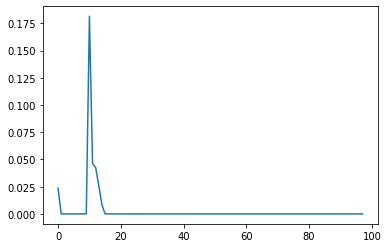

KeyboardInterrupt: ignored

In [105]:
# Testing neural network!

import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):
    
  # Entrenemos a la red!
  pY = train(neural_n, X, Y, l2_cost, learning_rate=0.05)
  
  if i % 25 == 0:  
    loss.append(l2_cost[0](pY, Y))
  
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]    

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)  
